<a href="https://colab.research.google.com/github/eugenefauntleroy/press_freedom_cluster_analysis/blob/main/cluster_analysis_press_freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#display data
rsf_data.head()

,Ranking,Country,Score,Political Context,Economic Context,Legal Framework,Safety Score,Sociocultural Context,Cluster
0,1,Norway,92.65,94.89,90.38,92.23,92.03,93.71,1
1,2,Denmark,90.27,94.34,83.67,89.18,92.97,91.17,1
2,3,Sweden,88.84,91.96,87.66,90.27,84.14,90.18,1
3,4,Estonia,88.83,91.11,81.97,87.87,93.20,90.00,1
4,5,Finland,88.42,90.40,82.03,86.64,92.26,90.77,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

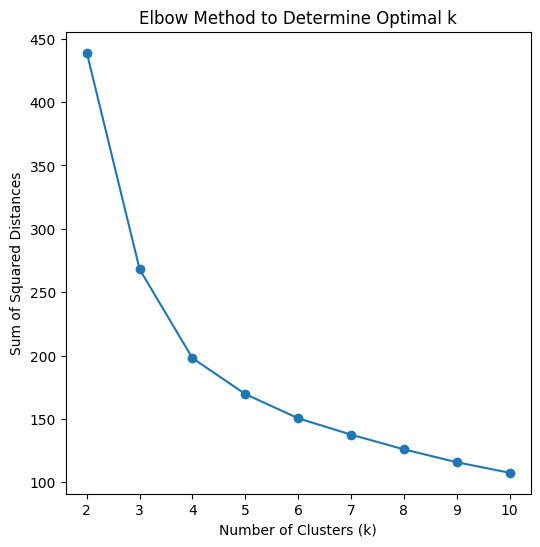

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-56a4a5ab0911>:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = rsf_data.groupby('Cluster').mean()


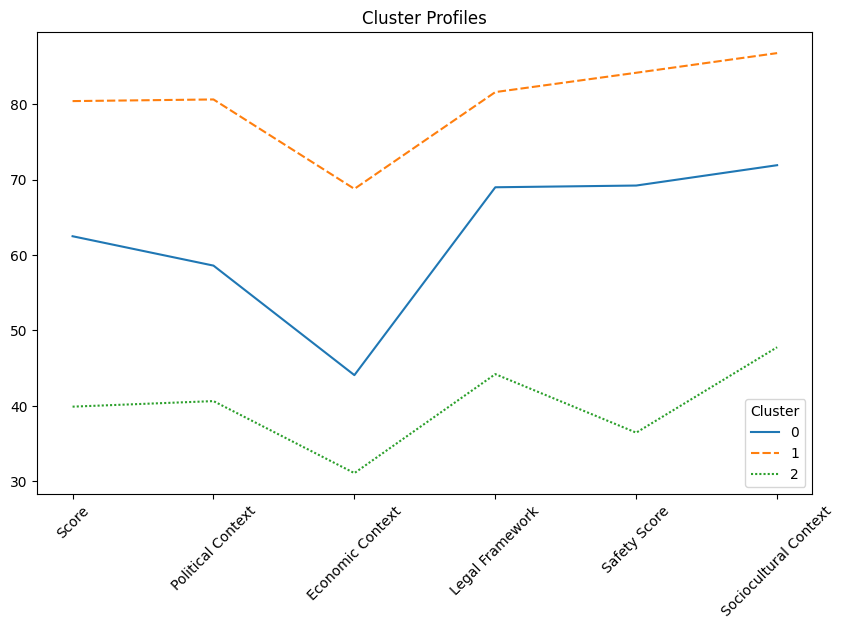

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data—replace with your own path
rsf_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desktop_data/DATA/RSB_DataSet.csv')

# Selecting the score columns
score_columns = ['Score', 'Political Context', 'Economic Context', 'Legal Framework', 'Safety Score', 'Sociocultural Context']

# Normalizing the data
data_for_clustering = rsf_data[score_columns].copy()
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Running KMeans with a range of k values to find the best one (using the elbow method)
sse = []  # List to hold the sum of squared distances for each k
k_values = range(2, 11)  # Testing k values from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    sse.append(kmeans.inertia_)

# Plotting the SSE for each k value
plt.figure(figsize=(6, 6))
plt.plot(k_values, sse, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# In this case, let's choose k = 3
k_optimal = 3
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans_optimal.fit_predict(data_for_clustering_scaled)

# Adding the cluster labels to the original data
rsf_data['Cluster'] = clusters

#display data
rsf_data.head()

# Calculating the mean score for each indicator within each cluster
cluster_profiles = rsf_data.groupby('Cluster').mean()

# Transposing the DataFrame for easier plotting
cluster_profiles_transposed = cluster_profiles[score_columns].transpose()

# Creating a line plot of the cluster profiles
plt.figure(figsize=(10, 6))
sns.lineplot(data=cluster_profiles_transposed)
plt.xticks(rotation=45)
plt.title('Cluster Profiles')
plt.show()

<ipython-input-11-0746708c163e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = rsf_data.groupby('Cluster').mean()


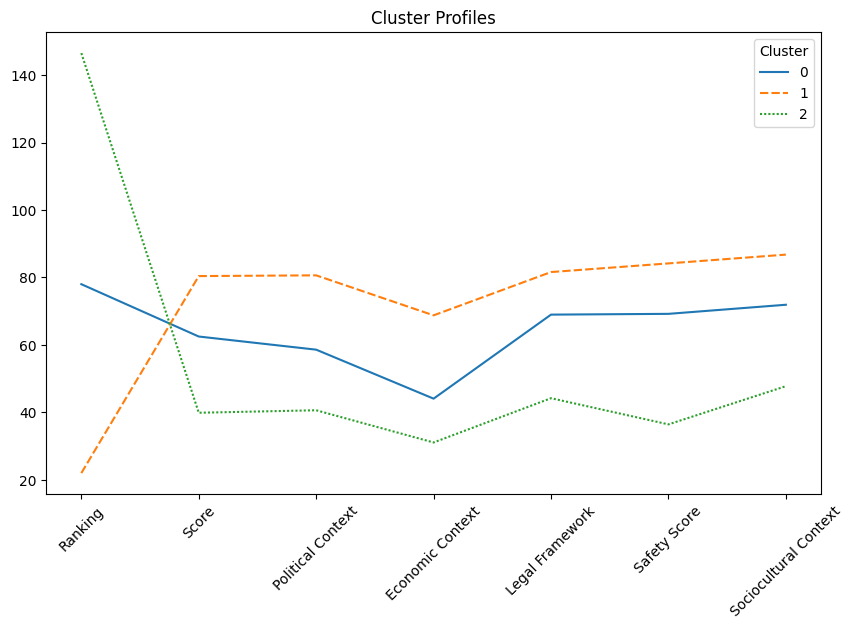

In [11]:
# Calculating the mean score for each indicator within each cluster
cluster_profiles = rsf_data.groupby('Cluster').mean()

# Transposing the DataFrame for easier plotting
cluster_profiles = cluster_profiles.transpose()

# Creating a line plot of the cluster profiles
plt.figure(figsize=(10, 6))
sns.lineplot(data=cluster_profiles)
plt.xticks(rotation=45)
plt.title('Cluster Profiles')
plt.show()